<a href="https://colab.research.google.com/github/Kyouma45/Eletronic-Vehicle-Market-Segmentation/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv('/content/sample_data/IEA-EV-dataEV_salesHistoricalCars.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [66]:
df=df[df['region']=='India']
df.shape

(90, 8)

In [67]:
df.drop(['region','mode','category'],axis=1,inplace=True)

In [68]:
df.head(10)

,parameter,powertrain,year,unit,value
1144,EV sales share,EV,2010,percent,0.021000
1145,EV stock,BEV,2010,Vehicles,880.000000
1146,EV sales,BEV,2010,Vehicles,450.000000
1147,Oil displacement Mbd,EV,2010,Milion barrels per day,0.000016
1148,"Oil displacement, million lge",EV,2010,"Oil displacement, million lge",0.910000
1149,EV stock share,EV,2010,percent,0.005200
1150,EV stock share,EV,2011,percent,0.007000
1151,Oil displacement Mbd,EV,2011,Milion barrels per day,0.000031
1152,"Oil displacement, million lge",EV,2011,"Oil displacement, million lge",1.800000
1153,EV stock,BEV,2011,Vehicles,1300.000000


About

With the filtered data for India, we can perform various analyses, such as:

    1. EV Sales Trends in India: Analyze how EV sales have evolved over the years in India.

    2. EV Stock Trends in India: Examine the growth of EV stock in India.

    3. Powertrain Analysis: Compare the sales and stock of different powertrain types (e.g., BEV, PHEV) in India.

    4. Market Share Analysis: Calculate the market share of EVs in India and track its changes over time.

    5. Yearly Comparison: Compare data between different years to identify trends and changes.



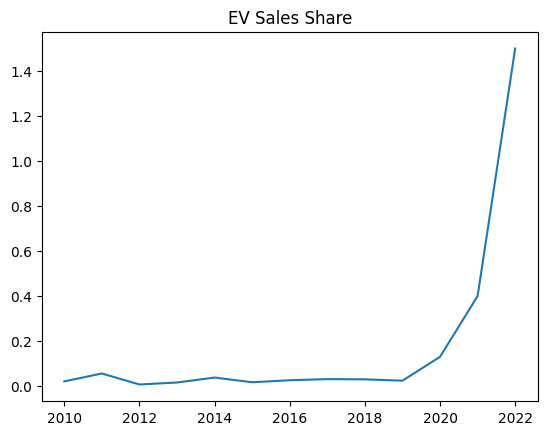

In [69]:
temp=df[df['parameter']=='EV sales share']
plt.title('EV Sales Share')
plt.plot('year','value',data=temp)

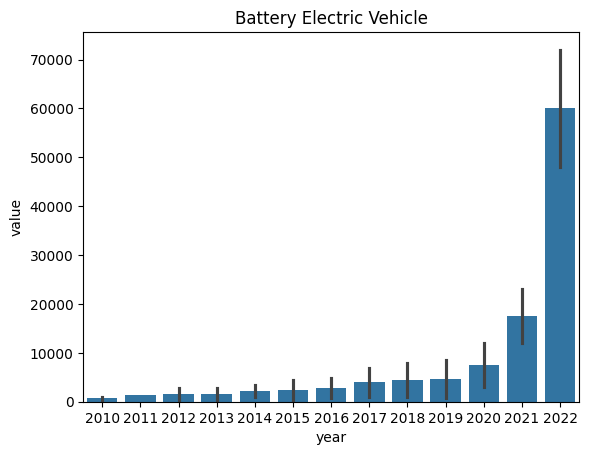

In [70]:
temp=df[df['powertrain']=='BEV']
plt.title('Battery Electric Vehicle')
sns.barplot(x='year', y='value', data=temp)
plt.show()

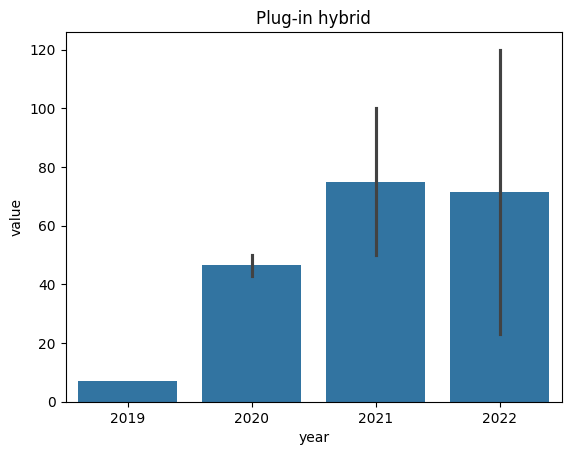

In [71]:
temp=df[df['powertrain']=='PHEV']
plt.title('Plug-in hybrid')
sns.barplot(x='year', y='value', data=temp)
plt.show()


    Plug-in hybrid: graph decreasing
    Battery Electric Vehicle: graph increasing

In [72]:
df1=pd.read_csv('/content/sample_data/RS_Session_256_AU_2673_2.i.csv')
df1.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


<ipython-input-73-e7a46e588d1d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90);


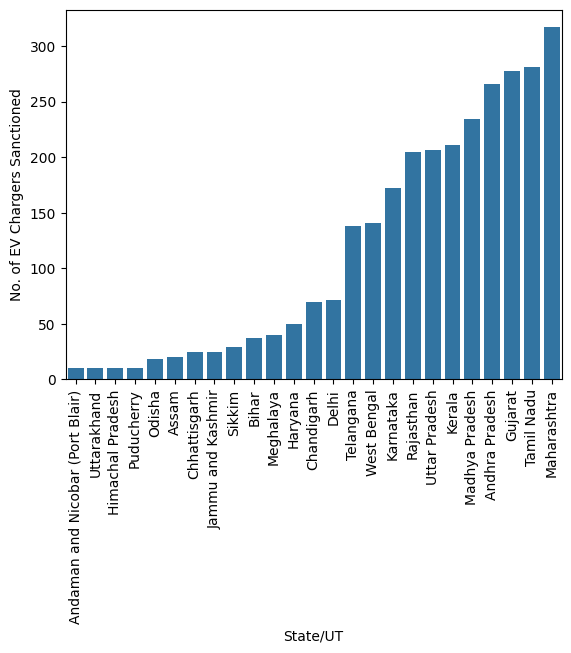

In [73]:
df1=df1.sort_values(by=['No. of EV Chargers Sanctioned'])
df1=df1.iloc[0:-1]
plot=sns.barplot(x='State/UT',y='No. of EV Chargers Sanctioned',data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

More the charging stations, more people buy EVs

In [74]:
df2=pd.read_csv('/content/sample_data/EV_India.csv')
df2.head(7)

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"


In [75]:
df2.dropna(inplace=True)
df2['Total Electric Vehicle']=pd.to_numeric(df2['Total Electric Vehicle'].str.replace(',', '', regex=True))
df2['Total']=pd.to_numeric(df2['Total'].str.replace(',', '', regex=True))

<ipython-input-76-4c8d02c2512e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90);


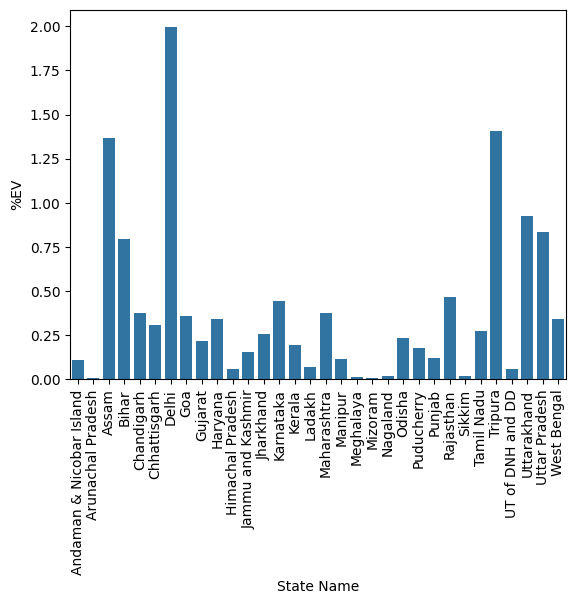

In [76]:
df2['%EV']=(df2['Total Electric Vehicle']/df2['Total'])*100
plot=sns.barplot(x='State Name',y='%EV',data=df2)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

PCA

In [77]:
df.head()
df2=df

In [78]:
col=df.columns

#converting object type into numerical
from sklearn.preprocessing import LabelEncoder
lst=df.select_dtypes(include=['object'])
for _ in lst:
  encoder=LabelEncoder()
  df[_]=encoder.fit_transform(df[_])

#Applying Normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
temp=scaler.transform(df)

df=pd.DataFrame(temp,columns=col)
df.head()


,parameter,powertrain,year,unit,value
0,-0.829399,0.344124,-1.724938,1.106332,-0.261063
1,-0.347812,-1.376494,-1.724938,0.240507,-0.167911
2,-1.310985,-1.376494,-1.724938,0.240507,-0.213430
3,1.096947,0.344124,-1.724938,-1.491143,-0.261065
4,1.578534,0.344124,-1.724938,-0.625318,-0.260969


In [79]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
df_pca=pca.fit_transform(df)
df_pca[:5,]

array([[ 0.96299799, -1.793236  ,  0.02715   ,  0.80357528,  0.53322322],
       [ 0.9527787 , -1.25902414, -1.60399569, -0.08355143,  0.06667709],
       [ 1.54384896, -1.38321061, -1.32500828, -0.45967202,  0.65462875],
       [-1.6772916 , -0.78635442, -1.49923995,  0.5292575 ,  0.79327932],
       [-1.50486435, -1.01184425, -1.30375855,  1.02781484,  0.00955151]])

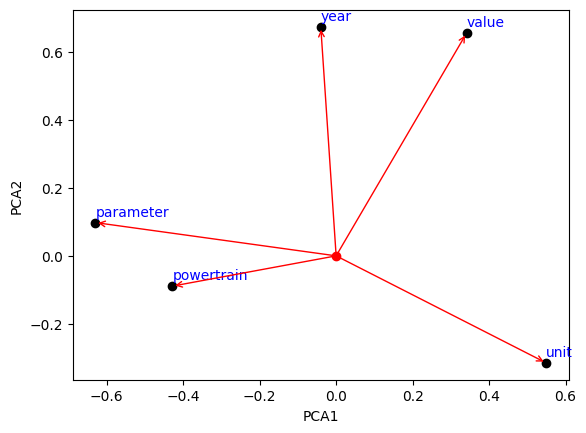

In [80]:
def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x,y,name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

pca_plot(pca, df2)

In [81]:
data=pd.read_csv('/content/sample_data/cars.csv',delimiter=';')
data=data.iloc[1:,]
data.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 1 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           406 non-null    object
 1   MPG           406 non-null    object
 2   Cylinders     406 non-null    object
 3   Displacement  406 non-null    object
 4   Horsepower    406 non-null    object
 5   Weight        406 non-null    object
 6   Acceleration  406 non-null    object
 7   Model         406 non-null    object
 8   Origin        406 non-null    object
dtypes: object(9)
memory usage: 28.7+ KB


In [83]:
data['MPG']=pd.to_numeric(data['MPG'])
data['Cylinders']=pd.to_numeric(data['Cylinders'])
data['Displacement']=pd.to_numeric(data['Displacement'])
data['Horsepower']=pd.to_numeric(data['Horsepower'])
data['Weight']=pd.to_numeric(data['Weight'])
data['Acceleration']=pd.to_numeric(data['Acceleration'])
data['Model']=pd.to_numeric(data['Model'])

In [84]:
encoder=LabelEncoder()
encoder.fit(data['Origin'])
data['Origin']=encoder.transform(data['Origin'])

In [85]:
data.drop('Car',axis=1,inplace=True)

In [86]:
data.shape

(406, 8)

In [87]:
scaler=StandardScaler()
temp=scaler.fit_transform(data)

pca=PCA(n_components=8)
data_pca=pca.fit_transform(temp)

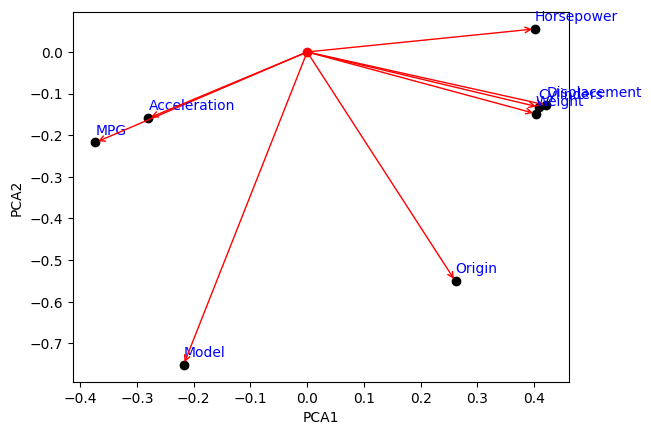

In [88]:
pca_plot(pca, data, 0, 1)

In [89]:
data=pd.read_csv('/content/sample_data/Electric Car.csv')
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [91]:
data.select_dtypes(include='object').columns

Index(['Brand', 'Model', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment'],
      dtype='object')

In [92]:
data.drop(['Model','Brand','FastCharge_KmH'],axis=1,inplace=True)

In [93]:
data['Seats']=pd.to_numeric(data['Seats'])
data['PriceEuro']=pd.to_numeric(data['PriceEuro'])
data['Range_Km']=pd.to_numeric(data['Range_Km'])
data['TopSpeed_KmH']=pd.to_numeric(data['TopSpeed_KmH'])
data['Efficiency_WhKm']=pd.to_numeric(data['Efficiency_WhKm'])
data['AccelSec']=pd.to_numeric(data['AccelSec'])

In [94]:
lst=['RapidCharge','PowerTrain','PlugType','BodyStyle','Segment']
for _ in lst:
  encoder=LabelEncoder()
  data[_]=encoder.fit_transform(data[_])

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccelSec         103 non-null    float64
 1   TopSpeed_KmH     103 non-null    int64  
 2   Range_Km         103 non-null    int64  
 3   Efficiency_WhKm  103 non-null    int64  
 4   RapidCharge      103 non-null    int64  
 5   PowerTrain       103 non-null    int64  
 6   PlugType         103 non-null    int64  
 7   BodyStyle        103 non-null    int64  
 8   Segment          103 non-null    int64  
 9   Seats            103 non-null    int64  
 10  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 9.0 KB


In [96]:
X=data.drop('PriceEuro',axis=1)
y=data['PriceEuro']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [98]:
import xgboost as xg
xgb=xg.XGBRegressor()
xgb.fit(X_train_scaled,y_train)
predicted=xgb.predict(X_test_scaled)

In [99]:
print(xgb.score(X_train_scaled, y_train))
print(xgb.score(X_test_scaled, y_test))

0.9999394774788846
0.5837952378524647
